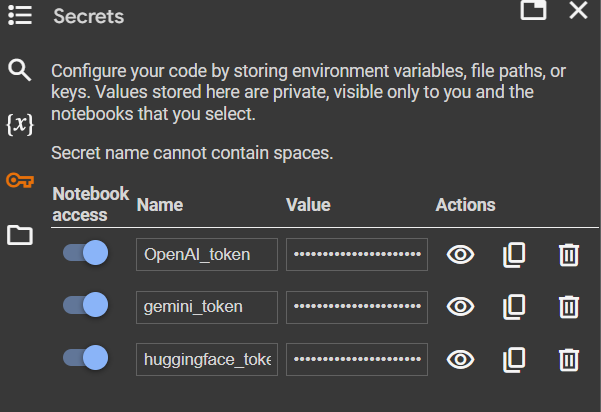

##Hugging Face API (Open Source Model)


In [ ]:
from google.colab import userdata
API_TOKEN=userdata.get('huggingface_token')

In [ ]:
#GEMMA

#google/gemma-7b


google/gemma-7b

7b--> 7 billion parameters --> It represents the complexity of neural network

https://huggingface.co/docs/api-inference/en/quicktour

In [ ]:
import requests
import json

In [ ]:
API_URL = "https://api-inference.huggingface.co/models/google/gemma-7b"
headers = {"Authorization": f"Bearer {API_TOKEN}"}

In [ ]:
def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    #print(response)
    return response.json()


In [ ]:
output=query({
    "inputs":"Can you please let us know what is the capital of India "

})

In [ ]:
output

[{'generated_text': 'Can you please let us know what is the capital of India \n\nA. Delhi\n\nB. Uttar Pradesh\n\nC. Karnataka\n\nD. Tamil Nadu'}]

In [ ]:
question={
    "inputs":"Can you please let me know Population of India"

}

In [ ]:
output=query(question)

In [ ]:
output[0]['generated_text']

'Can you please let me know Population of India for the following years 1750, 1800, 1850, 1900, 1950 and 2000. Sources of data? Also What were the reasons for large population increase in the above time period?\n\nAnswer:\n\nThe population of India in 1750 was about 860 million. It increased to about 1.3 billion in 1950.\nIn '

In [ ]:
#mistralai/Mixtral-8x7B-Instruct-v0.1
API_URL = "https://api-inference.huggingface.co/models/mistralai/Mixtral-8x7B-Instruct-v0.1"
headers = {"Authorization": f"Bearer {API_TOKEN}"}

In [ ]:
query(question)

[{'generated_text': 'Can you please let me know Population of India with change from 2010  to 2019.\n\nCensus 2011 in India was the 15th national census of the country. The population was as follows –\n\nThe population of India according to World Bank shows a steady increase in Indian population since 1990 –\n\nIndia’s population wouldn’t have increased much in 2019 from 2010 so I expect numbers around the'}]

##OPENAI API(GPT)

In [ ]:
from google.colab import userdata
OPENAI_API=userdata.get('OpenAI_token')

https://platform.openai.com/docs/quickstart?context=python

In [ ]:
pip install openai

In [ ]:
from openai import OpenAI

In [ ]:
client=OpenAI(api_key=OPENAI_API)
client

In [ ]:
models=client.models.list().data


In [ ]:
models[0]

Model(id='dall-e-3', created=1698785189, object='model', owned_by='system')

In [ ]:
import pandas as pd

In [ ]:
allmodels=pd.DataFrame(models,columns=["id","created","object","owned_by"])

In [ ]:
allmodels

,id,created,object,owned_by
0,"(id, dall-e-3)","(created, 1698785189)","(object, model)","(owned_by, system)"
1,"(id, text-embedding-3-large)","(created, 1705953180)","(object, model)","(owned_by, system)"
2,"(id, gpt-3.5-turbo-0613)","(created, 1686587434)","(object, model)","(owned_by, openai)"
3,"(id, dall-e-2)","(created, 1698798177)","(object, model)","(owned_by, system)"
4,"(id, gpt-3.5-turbo-instruct-0914)","(created, 1694122472)","(object, model)","(owned_by, system)"
5,"(id, whisper-1)","(created, 1677532384)","(object, model)","(owned_by, openai-internal)"
6,"(id, tts-1-hd-1106)","(created, 1699053533)","(object, model)","(owned_by, system)"
7,"(id, tts-1-hd)","(created, 1699046015)","(object, model)","(owned_by, system)"
8,"(id, babbage-002)","(created, 1692634615)","(object, model)","(owned_by, system)"
9,"(id, text-embedding-3-small)","(created, 1705948997)","(object, model)","(owned_by, system)"


https://platform.openai.com/docs/models/gpt-3-5-turbo

MODEL	DESCRIPTION	CONTEXT WINDOW	TRAINING DATA

gpt-3.5-turbo-0125
New Updated GPT 3.5 Turbo

The latest GPT-3.5 Turbo model with higher accuracy at responding in requested formats and a fix for a bug which caused a text encoding issue for non-English language function calls. Returns a maximum of 4,096 output tokens. Learn more.

16,385 tokens

Up to Sep 2021

In [ ]:
response=client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[


              {"role":"system","content":"you are a funny assistant who describe everything in funniest way"},
              {"role":"user","content":"compose a poem for the indian people"}


    ]
)

In [ ]:
print(response.choices[0].message.content)

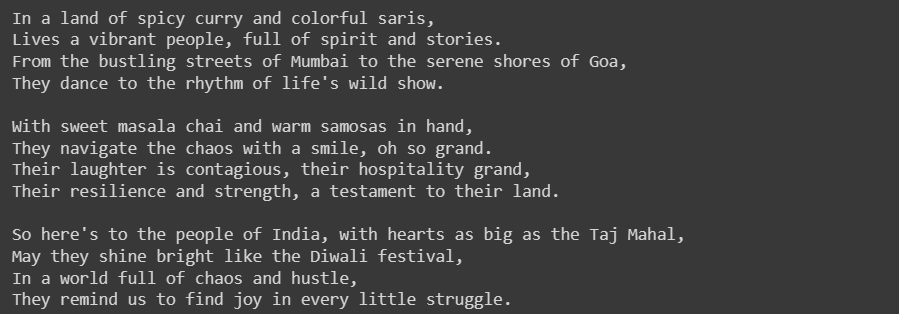

In [ ]:
# image generaiton

response = client.images.generate(
  model="dall-e-3",
  prompt="a white siamese cat",
  size="1024x1024",
  quality="standard",
  n=1,
)



In [ ]:
response = client.images.generate(
  model="dall-e-3",
  prompt="can you generate one crative and allegent thumbnil for my youtube vide which no has seen so far topic name of the youtube video is mlops",
  size="1024x1024",
  quality="standard",
  n=1,
)


In [ ]:
image_url = response.data[0].url

In [ ]:
image_url

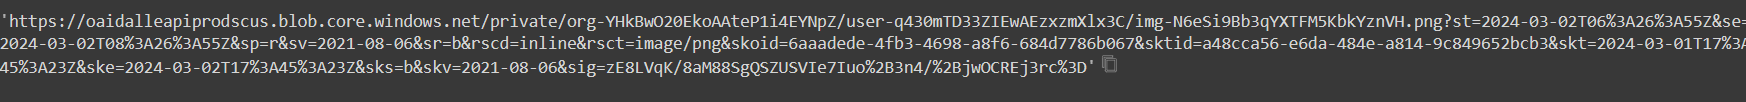

##Gemini API

In [ ]:
from google.colab import userdata
GEMINI_API=userdata.get('gemini_token')

In [ ]:
#GEMINI MOdel

In [ ]:
import google.generativeai as genai

In [ ]:
GEMINI_API

In [ ]:
genai.configure(api_key=GEMINI_API)

In [ ]:
for models in genai.list_models():
  print(models)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representatio

In [ ]:
for models in genai.list_models():
  if "generateContent" in models.supported_generation_methods:
    print(models.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


In [ ]:
model_text=genai.GenerativeModel("gemini-1.0-pro")

In [ ]:
response = model_text.generate_content("What is capital of India")
print(response.text)

New Delhi


In [ ]:
response.candidates

[content {
  parts {
    text: "New Delhi"
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [ ]:
response.parts[0]

#IMAGE-->Text

In [ ]:
model_image=genai.GenerativeModel("gemini-1.0-pro-vision-latest")

In [ ]:
!curl -o image.jpg "https://www.hindustantimes.com/ht-img/img/2023/03/24/550x309/robert-lukeman-zNN6ubHmruI-unsplash_1679659189331_1679659234951_1679659234951.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58659    0 58659    0     0   203k      0 --:--:-- --:--:-- --:--:--  203k


In [ ]:
import PIL.Image

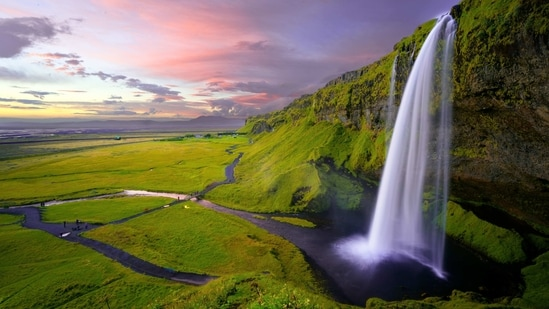

In [ ]:
PIL.Image.open("image.jpg")

In [ ]:
image=PIL.Image.open("image.jpg")

In [ ]:
model_image.generate_content(image)

In [ ]:
model_image.generate_content(image).text

' This is a photo of a waterfall in Iceland. The waterfall is called Skógafoss and it is located on the south coast of Iceland. It is one of the most popular tourist destinations in Iceland.'

In [ ]:
!curl -o image.jpg "https://images.pexels.com/photos/358457/pexels-photo-358457.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 89593  100 89593    0     0   709k      0 --:--:-- --:--:-- --:--:--  711k


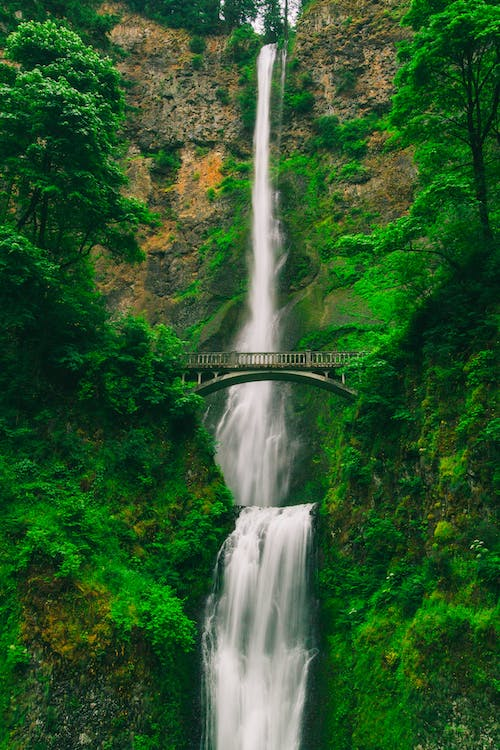

In [ ]:
PIL.Image.open("image.jpg")

In [ ]:
image=PIL.Image.open("image.jpg")

In [ ]:
model_image.generate_content(image).text

' This photo is of a waterfall in Oregon. The waterfall is surrounded by lush green trees and moss-covered rocks. The water is crystal clear and looks very refreshing. The photo is taken from a low angle, which makes the waterfall look even more majestic. The bridge in the middle of the waterfall adds a nice touch and makes the photo even more interesting.'